In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#Listing all the data available in my folder for dataset 
#accessing directories and sub directories inn a top down or bottom up approach
import os
for dirname, _, filenames in os.walk('Mera_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Mera_Dataset\annotations\trainval.txt
Mera_Dataset\annotations\xmls\ABbframe00154.xml
Mera_Dataset\annotations\xmls\ABbframe00160.xml
Mera_Dataset\annotations\xmls\ABbframe00166.xml
Mera_Dataset\annotations\xmls\ABbframe00169.xml
Mera_Dataset\annotations\xmls\ABbframe00190.xml
Mera_Dataset\annotations\xmls\ABbframe00235.xml
Mera_Dataset\annotations\xmls\ABbframe00265.xml
Mera_Dataset\annotations\xmls\ABbframe00271.xml
Mera_Dataset\annotations\xmls\ABbframe00274.xml
Mera_Dataset\annotations\xmls\ABbframe00277.xml
Mera_Dataset\annotations\xmls\ABbframe00280.xml
Mera_Dataset\annotations\xmls\ABbframe00283.xml
Mera_Dataset\annotations\xmls\ABbframe00286.xml
Mera_Dataset\annotations\xmls\ABbframe00292.xml
Mera_Dataset\annotations\xmls\ABbframe00295.xml
Mera_Dataset\annotations\xmls\ABbframe00298.xml
Mera_Dataset\annotations\xmls\ABbframe00301.xml
Mera_Dataset\annotations\xmls\ABbframe00304.xml
Mera_Dataset\annotations\xmls\ABbframe00313.xml
Mera_Dataset\annotations\xmls\ABbframe00316.xml
Me

# Importing libraries

In [3]:
# Importing necessary libraries
import numpy as np

# Loading and Splitting Data.
from sklearn.model_selection import train_test_split

# The pyplot module provides a convenient interface for creating various types of plots
import matplotlib.pyplot as plt

#OpenCV (Open Source Computer Vision Library)
import cv2

#It is often used for tasks like shuffling data, creating random samples, or introducing randomness in simulations.
import random

# It is commonly used for tasks such as file and directory manipulation ,intercting with opearating system
import os

#Python Imaging Library ,for basic image processing tasks, such as resizing, cropping, and converting between different image formats.
from PIL import Image

#data manipulation and analysis library
import pandas as pd

#t allows parsing, creating, and manipulating XML documents.
from xml.dom import minidom

#. It is commonly employed in handling tabular data.
import csv

In [4]:
#we loop out_each class and its labels one by one to process and agument
image_dir='Mera_Dataset/images/'
annot_dir='Mera_Dataset/annotations/xmls/'
    

In [5]:
def rescaling(path_image, targetSize, xmin, ymin, xmax, ymax):
    imageToPredict = cv2.imread(path_image, 3)

    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]

    x_scale = targetSize / x_
    y_scale = targetSize / y_
    img = cv2.resize(imageToPredict, (targetSize, targetSize))
    img = np.array(img)

    (origLeft, origTop, origRight, origBottom) = (xmin, ymin, xmax, ymax)

    xmin = int(np.round(origLeft * x_scale))
    ymin = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))

    return img, xmin, ymin, xmax, ymax

In [6]:
def extract_xml_contents(xml_file, image_dir, target_size=300):
    try:
        file = minidom.parse(xml_file)

        height, width = cv2.imread(image_dir).shape[:2]

        xmin = file.getElementsByTagName('xmin')
        x1 = float(xmin[0].firstChild.data)

        ymin = file.getElementsByTagName('ymin')
        y1 = float(ymin[0].firstChild.data)

        xmax = file.getElementsByTagName('xmax')
        x2 = float(xmax[0].firstChild.data)

        ymax = file.getElementsByTagName('ymax')
        y2 = float(ymax[0].firstChild.data)

        class_name = file.getElementsByTagName('name')
        if class_name[0].firstChild.data == 'knife':
            class_num = 1
        else:
            class_num = 0

        files = file.getElementsByTagName('filename')
        file_name = files[0].firstChild.data

        img, xmin, ymin, xmax, ymax = rescaling(image_dir, target_size, x1, y1, x2, y2)
        width = img.shape[0]
        height = img.shape[1]

        return file_name, width, height, class_num, xmin, ymin, xmax, ymax

    except FileNotFoundError:
        print(f"File not found: {xml_file}")
        return None

In [7]:
def xml_to_csv(image_dir,annot_dir):
    #List containing all our attributes regarding each image
    
    xml_list=[]
    
    #get each files in the image and annotation  directory
    mat_files=os.listdir(annot_dir)
    img_files=os.listdir(image_dir)
    
    #loop over each of the image and its labels
    
    for i,image in enumerate(img_files):
        xp=image.split('.')
        mat_path=os.path.join(annot_dir,(str(xp[0])+'.xml'))
        img_path=os.path.join(image_dir,image)
        #get attributes for each image
        value=extract_xml_contents(mat_path,img_path)
        
        xml_list.append(value)
    
    #columns for the pandas dataframe
    columns_name=['file_name','width','height','class_num',
                 'xmin','ymin','xmax','ymax']
    
    xml_df=pd.DataFrame(xml_list,columns=columns_name)
    
    #return the dataframe
    
    return xml_df

In [8]:
train_labels_df=xml_to_csv(image_dir,annot_dir)
train_labels_df.to_csv(('dataset.csv'),index=None)

In [9]:
train_labels_df

,file_name,width,height,class_num,xmin,ymin,xmax,ymax
0,ABbframe00154.jpg,300,300,1,140,124,158,156
1,ABbframe00160.jpg,300,300,1,123,117,138,152
2,ABbframe00166.jpg,300,300,1,114,108,130,147
3,ABbframe00169.jpg,300,300,1,119,105,134,143
4,ABbframe00190.jpg,300,300,1,182,130,200,152
...,...,...,...,...,...,...,...,...
995,RusoClases647.jpg,300,300,1,141,65,157,165
996,RusoClases648.jpg,300,300,1,145,66,161,165
997,RusoClases793.jpg,300,300,1,210,146,253,184
998,RusoClases794.jpg,300,300,1,218,154,261,188


In [10]:
class_list=sorted(['knife','no weapon'])

In [11]:
def preprocess_dataset(image_dir,csv_file):
    #list that will contain the whole dataset
    
    labels =[]
    boxes =[]
    img_list=[]
    
    
    with open(csv_file) as csvfile:
        
        rows=csv.reader(csvfile)
        columns=next(iter(rows))
        none={}
        for i,row in enumerate(rows):
            
            img_path=row[0]
            full_path=os.path.join(image_dir,img_path)
            img=cv2.imread(full_path)
            if img is None:
                none[i]=str(full_path)
            else:
                img=cv2.imread(full_path)
                
                image=cv2.resize(img,(300,300))
                

                # Normalize the image by dividing it by 255.0 
                image = image.astype("float") / 255.0

                # Append it to the list of images
                img_list.append(image)

                labels.append(int(row[3]))
                #scalling coordinates to the range of the [0,1] by dividing the cordinate by image size 1096 here
                arr=[float(row[4])/300,
                    float(row[5])/300,
                    float(row[6])/300,
                    float(row[7])/300]
                boxes.append(arr)
            
           
        return labels ,boxes,img_list,none

In [12]:
#all the iage will resized
train_labels,train_boxes,train_img,train_none=preprocess_dataset(image_dir,'dataset.csv')

In [13]:
#shuffling the data
combined_list=list(zip(train_img,train_boxes,train_labels))
random.shuffle(combined_list)
#exteract back the content of each list
train_img,train_boxes,train_labels=zip(*combined_list)

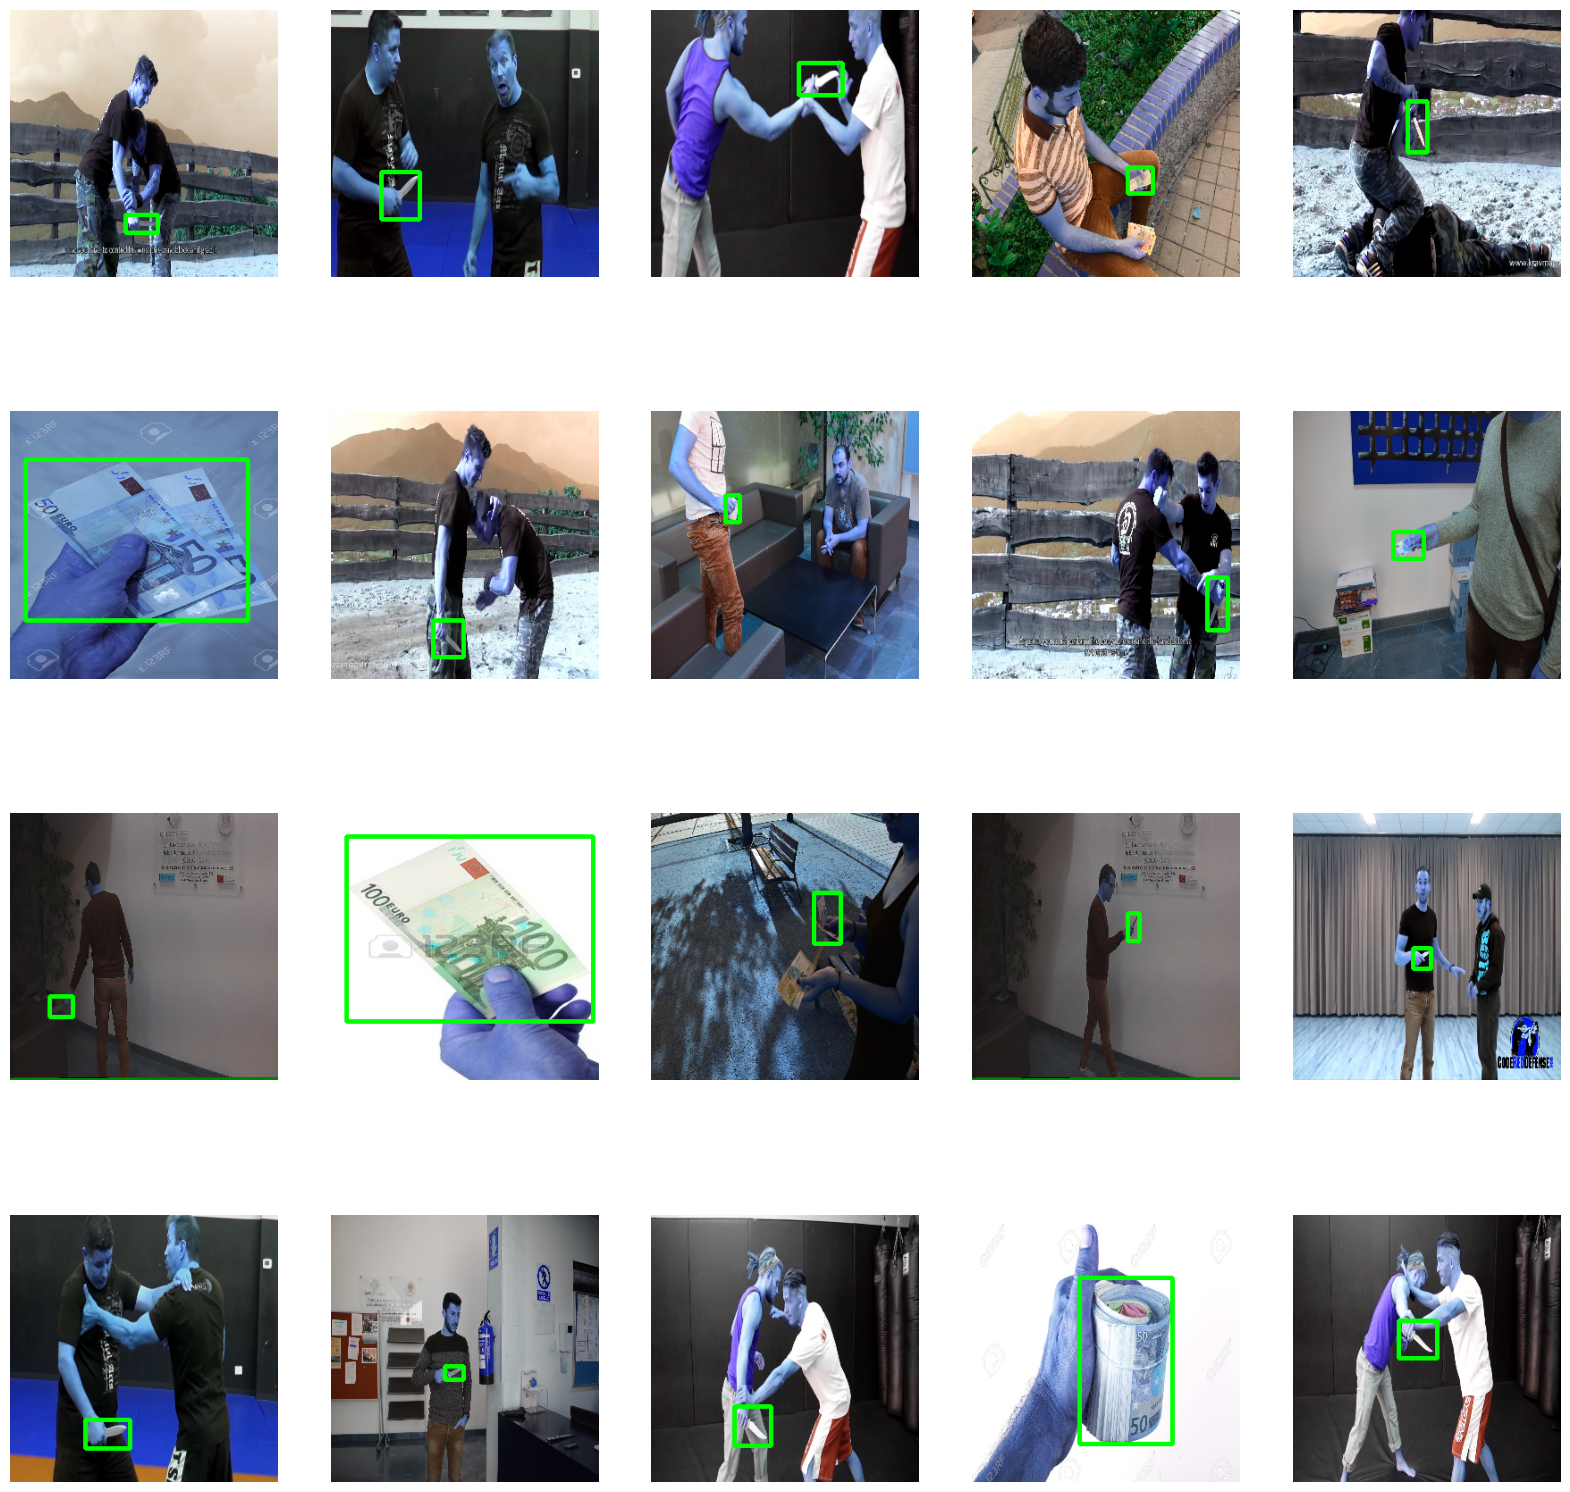

In [14]:
# Create a Matplotlib figure
plt.figure(figsize=(20,20))

# Generate a random sample of images each time the cell is run 
random_range = random.sample(range(1, len(train_img)), 20)

for itr, i in enumerate(random_range,1):

    # Bounding box of each image
    a1, b1, a2, b2 = train_boxes[i]
    img_size = 300

    # Rescaling the boundig box values to match the image size
    x1 = a1 * img_size
    x2 = a2 * img_size
    y1 = b1 * img_size
    y2 = b2 * img_size

    # The image to visualize
    image = train_img[i]

    # Draw bounding boxes on the image
    cv2.rectangle(image, (int(x1),int(y1)),(int(x2),int(y2)),(0,255,0), 3)
    
    # Clip the values to 0-1 and draw the sample of images
    img = np.clip(train_img[i], 0, 1)
    plt.subplot(4, 5, itr)
    plt.imshow(img)
    plt.axis('off')

In [15]:
train_images, val_images, train_labels, val_labels, train_boxes, val_boxes = train_test_split(
    np.array(train_img, dtype=np.float32),
    np.array(train_labels),
    np.array(train_boxes),
    test_size=0.1,
    random_state=43
)


In [16]:
print('Total Training Images: {}, Total Test Images: {}'.format(
    len(train_images), 
    len(val_images)))

Total Training Images: 900, Total Test Images: 100


In [17]:
import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import SGD

In [18]:
image_size=300

In [19]:
N_mobile = tf.keras.applications.NASNetMobile( input_tensor = Input(
    shape=(image_size, image_size, 3)), 
    include_top=False, 
    weights='imagenet')

In [20]:
# Let's create a function that will construct our model
def create_model(no_of_classes):
 
    # Freeze the whole model
    N_mobile.trainable = False
    base_model_output = N_mobile.output
    flattened_output = GlobalAveragePooling2D()(base_model_output)
    print(flattened_output.shape)
    class_prediction = Dense(256, activation="relu")(flattened_output)
    class_prediction = Dense(128, activation="relu")(class_prediction )
    class_prediction = Dropout(0.2)(class_prediction)
    class_prediction = Dense(64, activation="relu")(class_prediction)
    class_prediction = Dropout(0.2)(class_prediction )
    class_prediction = Dense(32, activation="relu")(class_prediction)
    class_prediction = Dense(no_of_classes, activation='softmax',name="class_output")(class_prediction)
    box_output = Dense(256, activation="relu")(flattened_output)
    box_output = Dense(128, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )
 
    box_output = Dense(64, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )
 
    box_output = Dense(32, activation="relu")(box_output)
    box_predictions = Dense(4, activation='sigmoid',
                            name= "box_output")(box_output)

    model = Model(inputs=N_mobile.input, outputs= [box_predictions, class_prediction])
 
    return model

In [21]:
model = create_model(2)
model

(None, 1056)


In [22]:
losses = { 
    "box_output": "mean_squared_error",
    "class_output": "sparse_categorical_crossentropy"
    }
loss_weights = {
    "box_output": 1.0, 
    "class_output": 1.0
    }
 
metrics = {
    'class_output': 'accuracy', 
    'box_output':  'mse'
    }
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 40, 
                    restore_best_weights = True
                     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.0002, 
                              patience = 30, min_lr = 1e-7, verbose = 1)
 
# Initialize Optimizer
opt = SGD(learning_rate = 1e-3, momentum = 0.9)
 
# Compile the model with Adam optimizer
model.compile(optimizer = opt, loss = losses, loss_weights = loss_weights, 
    metrics = metrics)

In [23]:
with tf.device('/device:GPU:0'):
  history = model.fit(x = train_images, 
                      y= {
                          "box_output": train_boxes, 
                          "class_output": train_labels
                          }, 
                      validation_data=(
                          val_images, 
                          {
                            "box_output": val_boxes, 
                            "class_output": val_labels
                            }), batch_size = 8, epochs = 10, 
                      callbacks=[reduce_lr, stop])

Epoch 1/10


113/113 [==============================] - 76s 407ms/step - loss: 0.4662 - box_output_loss: 0.0521 - class_output_loss: 0.4141 - box_output_mse: 0.0521 - class_output_accuracy: 0.8089 - val_loss: 0.2280 - val_box_output_loss: 0.0407 - val_class_output_loss: 0.1873 - val_box_output_mse: 0.0407 - val_class_output_accuracy: 0.9400 - lr: 0.0010
Epoch 2/10
113/113 [==============================] - 33s 288ms/step - loss: 0.1921 - box_output_loss: 0.0449 - class_output_loss: 0.1473 - box_output_mse: 0.0449 - class_output_accuracy: 0.9444 - val_loss: 0.1116 - val_box_output_loss: 0.0364 - val_class_output_loss: 0.0752 - val_box_output_mse: 0.0364 - val_class_output_accuracy: 0.9700 - lr: 0.0010
Epoch 3/10
113/113 [==============================] - 33s 293ms/step - loss: 0.1171 - box_output_loss: 0.0423 - class_output_loss: 0.0748 - box_output_mse: 0.0423 - class_output_accuracy: 0.9767 - val_loss: 0.1039 - val_box_output_loss: 0.0345 - val_class_output_loss: 0.0694 - val_box_outp

In [24]:
def plot(var1, var2, plot_name):
  # Get the loss metrics from the trained model
  c1 = history.history[var1]
  c2 = history.history[var2]
 
  epochs = range(len(c1)
                )
   
  # Plot the metrics
  plt.plot(epochs, c1, 'b', label=var1)
  plt.plot(epochs, c2, 'r', label=var2)
  plt.title(str(plot_name))
  plt.legend()

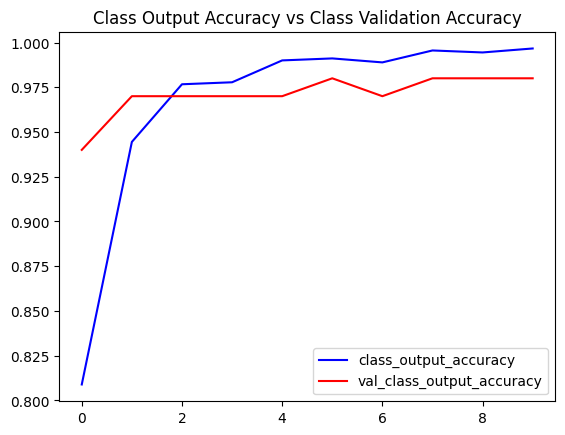

In [25]:
plot( 'class_output_accuracy', 'val_class_output_accuracy', 'Class Output Accuracy vs Class Validation Accuracy')


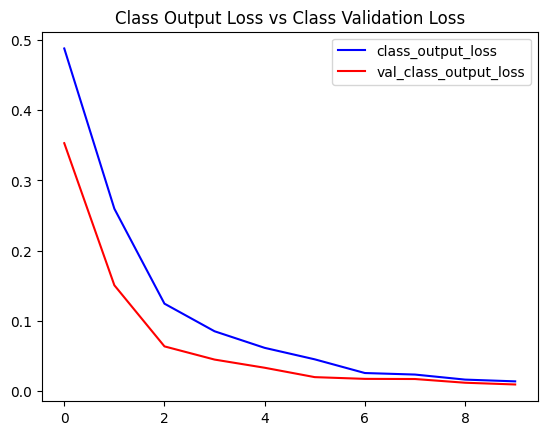

In [27]:

plot( 'class_output_loss', 'val_class_output_loss', 'Class Output Loss vs Class Validation Loss')


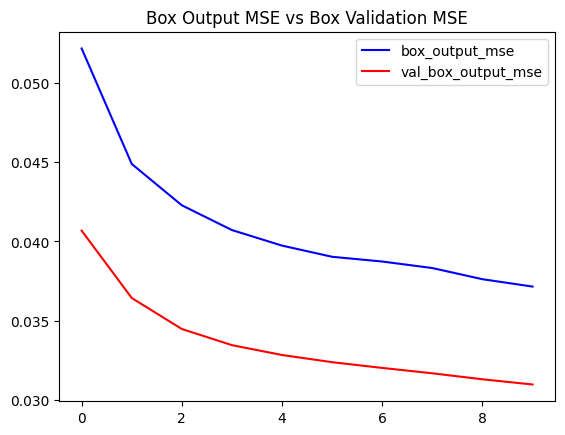

In [27]:
plot( 'box_output_mse', 'val_box_output_mse', 'Box Output MSE vs Box Validation MSE')


In [28]:

#Save your model here in .h5 format.
model.save('weapon_detect.h5')
 
# Load the saved model
# model = load_model('caltech.h5')

d:\Aditya\ThreatProject\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Enter your class names in this list
global label_names
 
# Must be same as the Annotations list we used
label_names = sorted(class_list)

In [30]:
# This function will preprocess images.
def preprocess(img, image_size = 300):
   
    image = cv2.resize(img, (image_size, image_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float") / 255.0
    # Expand dimensions as predict expect image in batches
    image = np.expand_dims(image, axis=0) 
    return image

In [31]:
def postprocess(image, results):
 
    # Split the results into class probabilities and box coordinates
    bounding_box, class_probs = results
    class_index = np.argmax(class_probs)
   
    # Use this index to get the class name.
    class_label = label_names[class_index]

    h, w = image.shape[:2]
 
    # Extract the Coordinates
    x1, y1, x2, y2 = bounding_box[0]
 
    # Convert the coordinates from relative (i.e. 0-1) to actual values
    x1 = int(w * x1)
    x2 = int(w * x2)
    y1 = int(h * y1)
    y2 = int(h * y2)
 
    # return the lable and coordinates
    return class_label, (x1,y1,x2,y2),class_probs

In [34]:
# We will use this function to make prediction on images.
def predict(image, returnimage = False,  scale = 0.9):
   
  processed_image = preprocess(image)
  results = model.predict(processed_image)
 
  label, (x1, y1, x2, y2), confidence = postprocess(image, results)
  cv2.rectangle(image, (x1,y1), (x2,y2), (0, 255, 100), 2)
  cv2.putText(
      image, 
      '{}'.format(label, confidence), 
      (x1, y2+(50)), 
      cv2.FONT_HERSHEY_COMPLEX, scale,
      (200, 300, 100),2)

 
  # Show the Image with matplotlib
  plt.figure(figsize=(10,10))
  plt.imshow(image[:,:,::-1])

In [35]:
img_dir='Mera_Dataset/images_test'
test_image=os.listdir(img_dir)

In [42]:
for i,img in enumerate(test_image):
  if i>=100:
      file_dir=os.path.join(img_dir,img)
      image = cv2.imread(file_dir)
      predict(image, scale = 1)
     

      # Display the processed image
      cv2.imshow("Image with Detection", image)
      cv2.waitKey(0)
  if i==110:
    break

1/1 [==============================] - 0s 139ms/step
